h(x) =-3.93 + 1.18X1


KeyError: 'a'

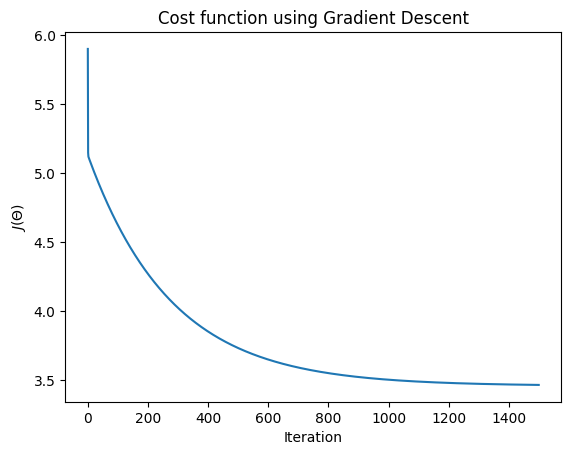

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("content/ex1.csv")
data

#compute cost value
def computeCost(X,y,theta):
  m=len(y) 
  h=X.dot(theta) 
  square_err=(h - y)**2
  return 1/(2*m) * np.sum(square_err) 
  
 #computing cost value
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m, 1)),data_n[:,0].reshape(m, 1),axis=1)
y=data_n[:,1].reshape (m,1) 
theta=np.zeros((2,1))
computeCost(X,y,theta) # Call the function

def gradientDescent (X,y, theta, alpha, num_iters):
  m=len (y)
  J_history=[]
  
  for i in range(num_iters):
    predictions = X.dot(theta)
    error = np.dot(X.transpose(), (predictions -y))
    descent=alpha * 1/m * error 
    theta-=descent
    J_history.append(computeCost (X,y, theta))
  return theta, J_history
  
  #h(x) value
theta,J_history = gradientDescent (X,y, theta, 0.01,1500)
print ("h(x) ="+str (round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"X1")

plt.plot(J_history)
plt.xlabel("Iteration") 
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

plt.scatter(data['a'],data['b'])
x_value=[x for x in range (25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value, color="r")
plt.xticks(np.arange (5,30,step=5)) 
plt.yticks(np.arange(-5,30,step=5)) 
plt.xlabel("Population of City (10,000s)") 
plt.ylabel("Profit ($10,000)") 
plt.title("Profit Prediction")
# Text(0.5, 1.0, 'Profit Prediction')

def predict (x,theta):
# 11 11 11
# Takes in numpy array of x and theta and return the predicted value of y based on theta
  predictions= np.dot (theta.transpose (),x)
  return predictions[0]
  
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

predict2=predict(np.array ([1,7]), theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))